In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Dataset is taken from https://archive.ics.uci.edu/ml/datasets/seeds


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/seeds_dataset.txt', sep="\\t", header=None)

data.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

In [0]:
data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [0]:
data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## EDA

In [0]:
data['class'].value_counts()

3    70
2    70
1    70
Name: class, dtype: int64

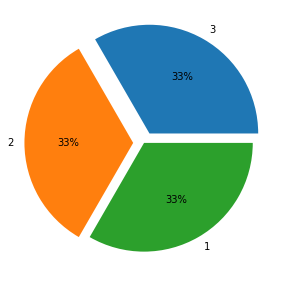

In [0]:
plt.figure(figsize=(15,5))

plt.pie(x = data['class'].value_counts().values,
        explode = (0.1,0.1, 0),
        autopct='%1.0f%%',
        labels = data['class'].value_counts().index)

plt.show()

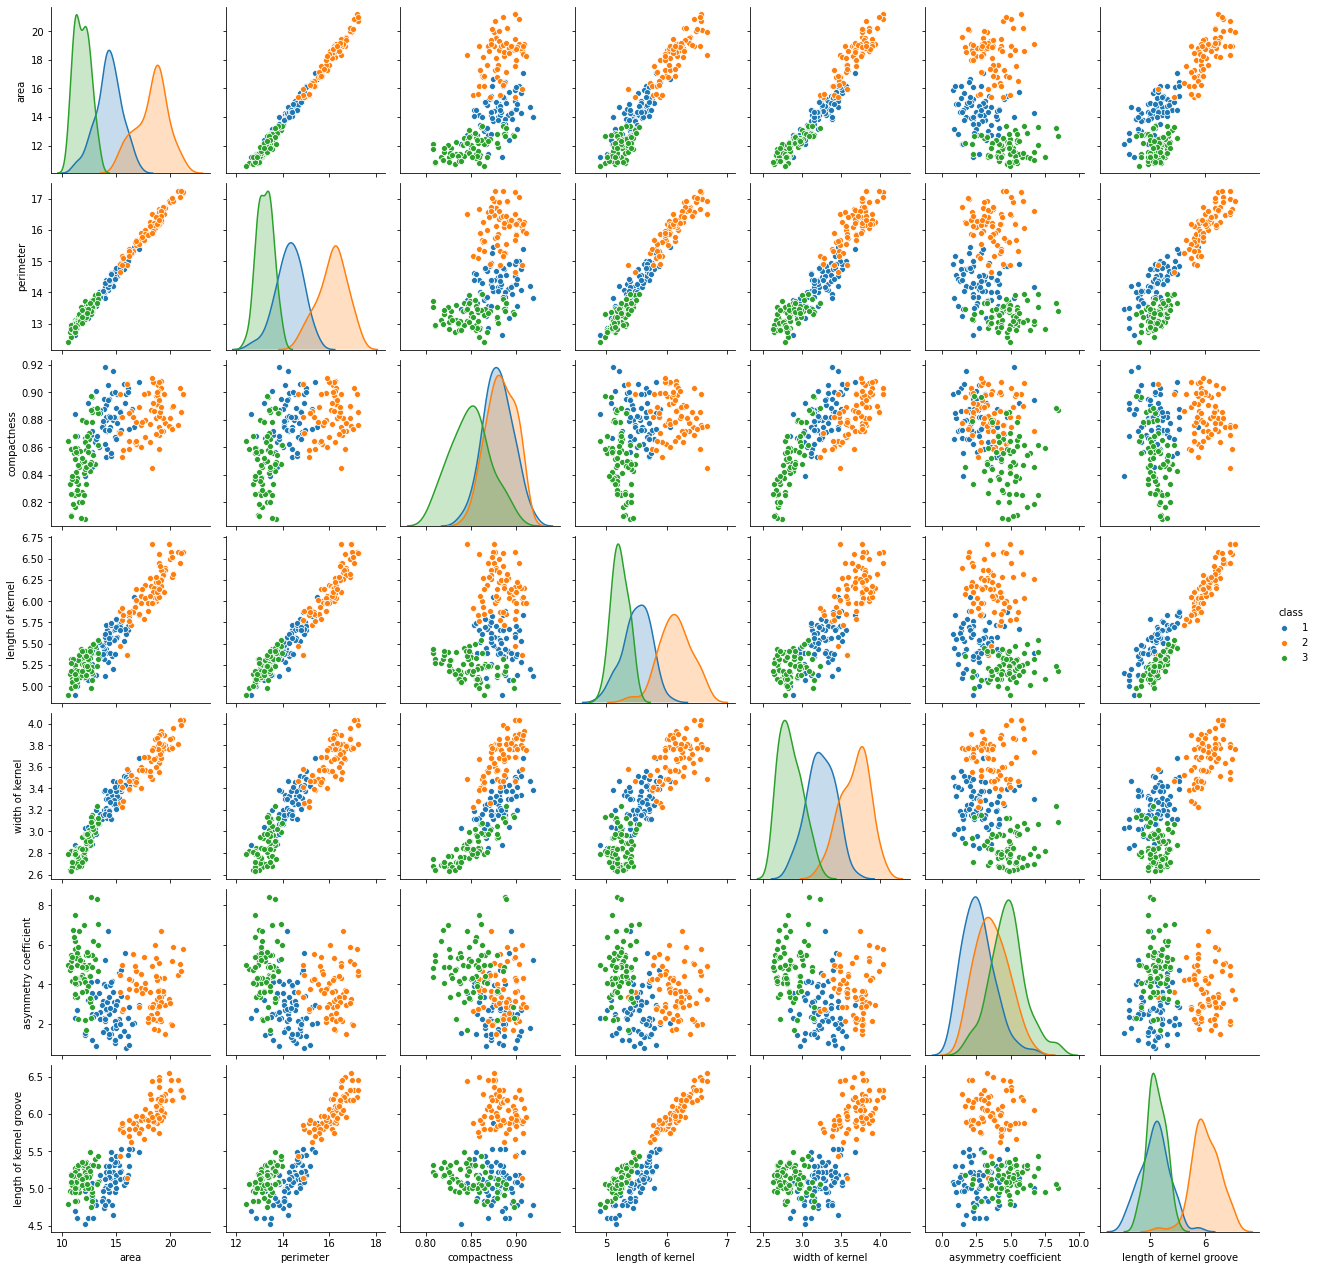

In [0]:
sns.pairplot(data, hue='class')

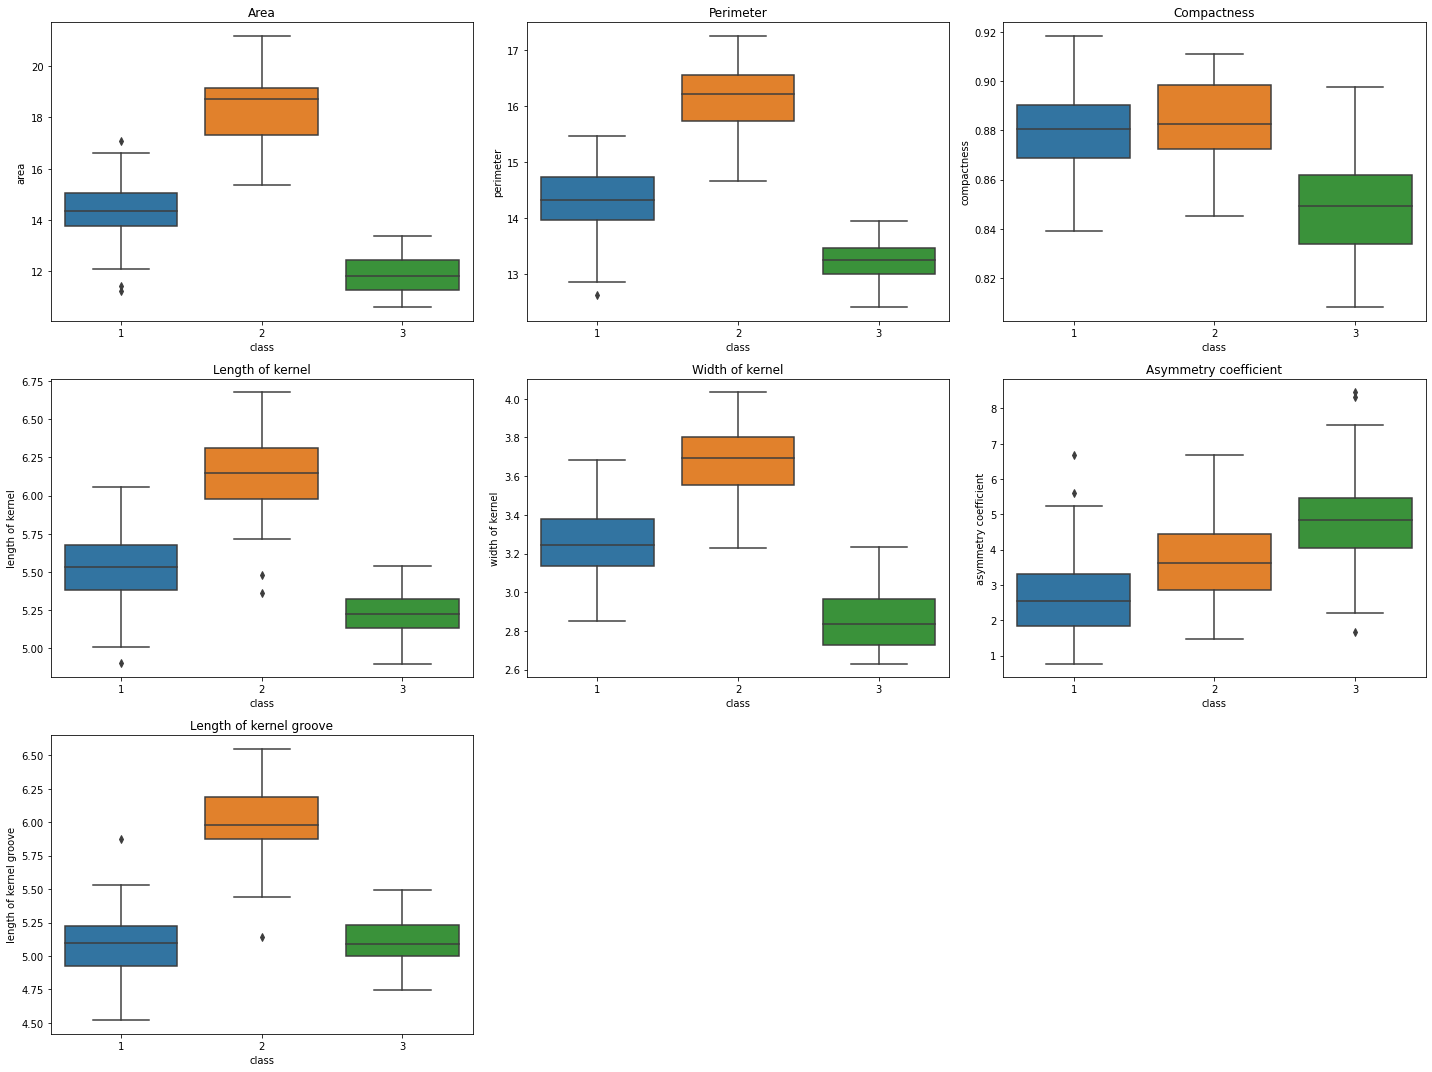

In [0]:
columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']

plt.figure(figsize=(20,15))

for n, m in zip(range(1,8),columns):
  plt.subplot(3,3,n)
  sns.boxplot(x='class', y = m, data = data)
  plt.title(m.capitalize())

plt.tight_layout()

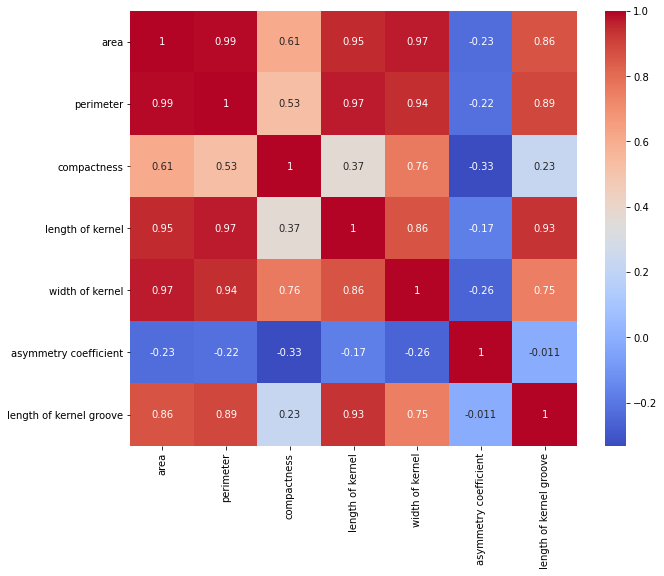

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop('class',axis=1).corr(),annot=True,cmap='coolwarm')

As can be seen in the pairplots and the boxplots, the area and perimeter are hightly correlated because the area formula is found using the perimeter as an argument.

The same can be said on the length and width or the kernel as well as the length of the kernel groove. Each of these are needed to calculated the area of the seed, that is the reason they are highly correlated.

## Data Pre-processing

In [0]:
X = data.drop('class',axis=1)

y = data['class']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

In [0]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NBC', GaussianNB()))
models.append(('SVM', SVC()))

In [0]:
results1 = []
names1 = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=101, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  results1.append(cv_results)
  names1.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.952206 (0.023939)
DTC: 0.897794 (0.062776)
RFC: 0.910294 (0.048418)
KNN: 0.922426 (0.070228)
NBC: 0.886397 (0.074160)
SVM: 0.886765 (0.049127)


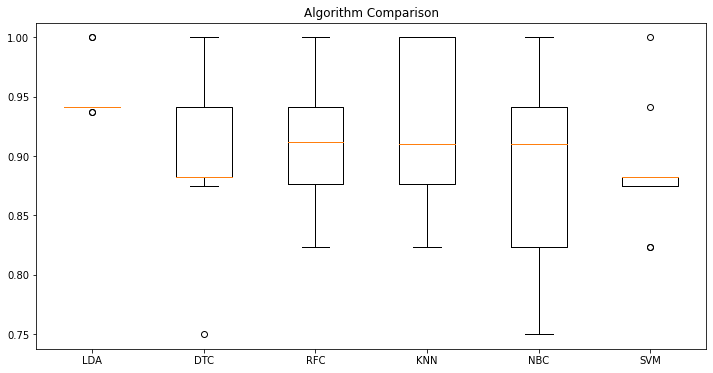

In [0]:
plt.figure(figsize=(12,6))

plt.boxplot(results1, labels=names1)
plt.title('Algorithm Comparison')

plt.show()

LDA model shows the best results among all the other models followed by models KNN and RFC respectively. However, KNN model has a very high variance.

## Prediction & Evaluation

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
# Predictions
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

pred = lda.predict(X_test)

In [0]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0  0]
 [ 0  8  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



LDA model predicts perfectly

## Data Pre-processing 2

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
# scaled the data
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Model 2

In [0]:
results2 = []
names2 = []

for name, model in models:
    kfold = KFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

    results2.append(cv_results)
    names2.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.952206 (0.023939)
DTC: 0.904044 (0.049447)
RFC: 0.910662 (0.047711)
KNN: 0.928309 (0.044764)
NBC: 0.886397 (0.074160)
SVM: 0.922426 (0.038364)


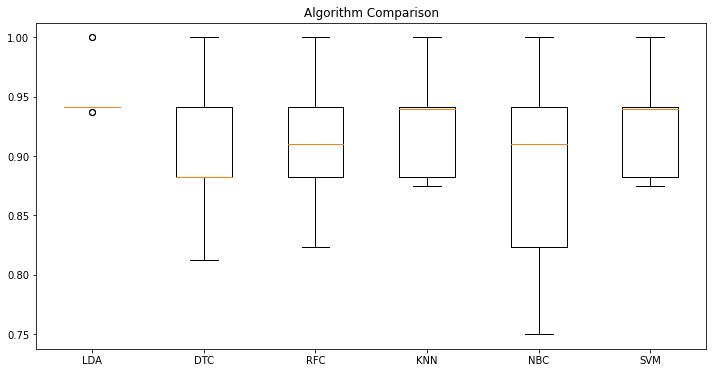

In [0]:
plt.figure(figsize=(12,6))

plt.boxplot(results2, labels=names2)
plt.title('Algorithm Comparison')

plt.show()

When the data is scaled, LDA model still performs better compared to the others, with not much changed in performance.

## Predictions & Evaluation 2

In [0]:
# Predictions
lda = LinearDiscriminantAnalysis()

lda.fit(X_train_scaled, y_train)

pred = lda.predict(X_test_scaled)

# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0  0]
 [ 0  8  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



Again, LDA model predict perfectly.

## Data Pre-pocessing 3

In [0]:
# randomize the rows
from sklearn.utils import shuffle

In [0]:
ran_data = shuffle(data)

ran_data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
192,11.87,13.02,0.8795,5.132,2.953,3.597,5.132,3
29,13.45,14.02,0.8604,5.516,3.065,3.531,5.097,1
27,12.74,13.67,0.8564,5.395,2.956,2.504,4.869,1
104,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
103,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,2


In [0]:
X = ran_data.drop(['class'],axis=1)

y = ran_data['class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=101)

In [0]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Model 3

In [0]:
results3 = []
names3 = []

for name, model in models:
    kfold = KFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

    results3.append(cv_results)
    names3.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.976471 (0.039019)
DTC: 0.916912 (0.054437)
RFC: 0.905515 (0.105765)
KNN: 0.940809 (0.074415)
NBC: 0.923162 (0.074560)
SVM: 0.934191 (0.042126)


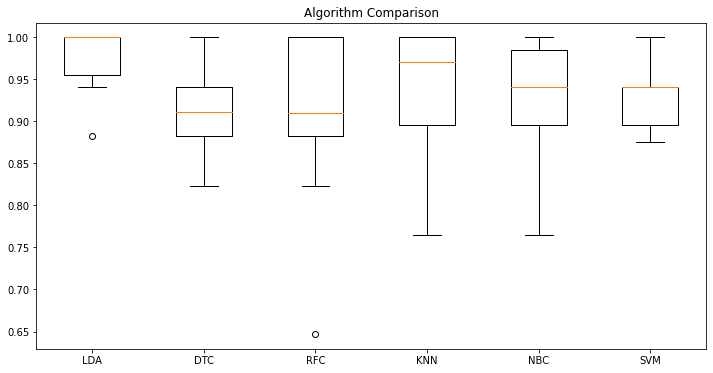

In [0]:
plt.figure(figsize=(12,6))

plt.boxplot(results3, labels=names3)
plt.title('Algorithm Comparison')

plt.show()

When the data is scaled and randomize, LDA still performs well compared to the others

In [0]:
res1 = [results1[n].mean() for n in range(6)]

res2 = [results2[n].mean() for n in range(6)]

res3 = [results3[n].mean() for n in range(6)]

# create a dataframe to show the mean results of all 3 different pre-processing methods
results_mean = pd.DataFrame({'normal': res1,
                             'scaled': res2,
                             'scaled & shuffle': res3},
                            index = ['LDA','DTC','RFC','KNN','NBC','SVM'])

results_mean

,normal,scaled,scaled & shuffle
LDA,0.952206,0.952206,0.976471
DTC,0.897794,0.904044,0.916912
RFC,0.910294,0.910662,0.905515
KNN,0.922426,0.928309,0.940809
NBC,0.886397,0.886397,0.923162
SVM,0.886765,0.922426,0.934191


As the data is scaled and randomize, all of the models used have an increase in performance. KNN and SVM models both increases in performance especially the SVM model which increase significantly.

## Prediction & Evaluation 3

In [0]:
# Predictions
lda = LinearDiscriminantAnalysis()

lda.fit(X_train_scaled, y_train)

pred = lda.predict(X_test_scaled)

In [0]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[14  0  2]
 [ 1 12  0]
 [ 1  0 12]]
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       1.00      0.92      0.96        13
           3       0.86      0.92      0.89        13

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.91        42
weighted avg       0.91      0.90      0.91        42



There is a drop in accuracy when predicting new data, this might be deal to the increase in variance as can be seen in the boxplot. However, LDA model still have a high accuracy in predicting new data.

In [0]:
# Predictions
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

In [0]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[13  1  2]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        16
           2       0.93      1.00      0.96        13
           3       0.87      1.00      0.93        13

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



In [0]:
# find k
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

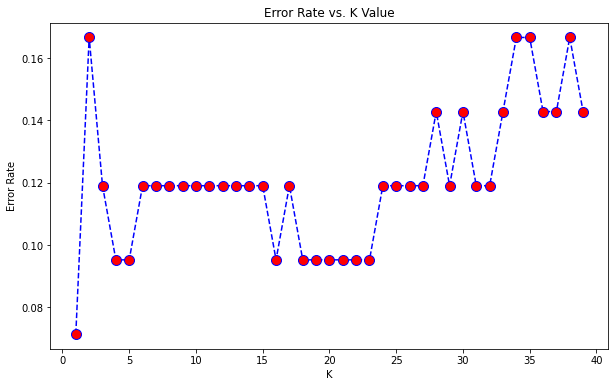

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looks like the best choice of K is 1, because it has the least error produce.

In [0]:
# Predictions
svm = SVC()

svm.fit(X_train_scaled, y_train)

pred = svm.predict(X_test_scaled)

In [0]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[14  0  2]
 [ 0 13  0]
 [ 1  0 12]]
              precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       1.00      1.00      1.00        13
           3       0.86      0.92      0.89        13

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



For scaled and randomize data, the best results are KNN and SVM models. However, LDA model also can be used as a training model.